In [1]:
pip install qiskit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.9 MB/s eta 0:00:00


In [2]:
pip install qiskit_aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 63.2 MB/s eta 0:00:00


In [3]:
pip install qiskit-ibm-runtime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 10.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.4/130.4 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.4/121.4 kB 12.1 MB/s eta 0:00:00
  Created wheel for ibm-platform-services: filename=ibm_platform_services-0.55.1-py3-none-any.whl size=339685 sha256=917263abee9a58e245952a695b817d77c0d4b4a6d6b7869463c5764baa647460
  Stored in directory: /root/.cache/pip/wheels/85/ac/f7/fcc0f6fb6fd090cb2c4f6f9fc55fd5aa36af0bfe1f44a9af71
  Created wheel for ibm-cloud-sdk

In [13]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

## Programa 1 "Ejemplo 1: Medir estado $|+\rangle$"

In [ ]:
# Crear un circuito cuántico simple
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

In [ ]:
# Cargar la cuenta de IBM Quantum
service = QiskitRuntimeService(channel="ibm_quantum", token="bd81212c3d44c996f8dfdb199adcebfc6456f7c6069e3cc9ebc90eb52e6c3d576681afc97fa6de052e631fb26ffbaa9f2b630a6c2124779df796a7a4cd6fc7bc")

# Seleccionar el backend menos ocupado
backend = service.least_busy(min_num_qubits=1, simulator=False)
print("Usando el backend:", backend)

# Transpilar el circuito para que sea compatible con el backend seleccionado
transpiled_circuit = transpile(qc, backend)

# Crear una sesión y ejecutar el circuito usando el sampler
with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    job = sampler.run(transpiled_circuit)
    result = job.result()

Usando el backend: <IBMBackend('ibm_kyoto')>


<ipython-input-9-54d4c8f34ba9>:13: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler()


Resultados de la simulación: {0: 698, 1: 325}


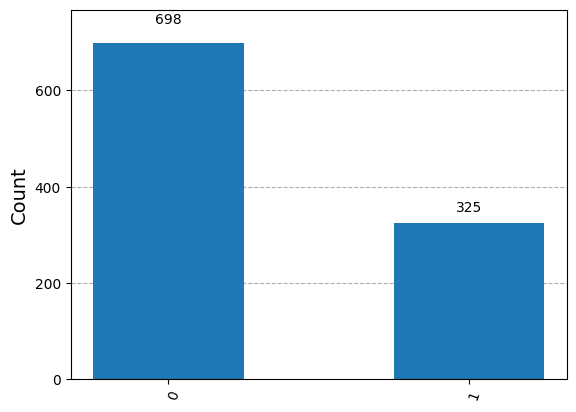

In [ ]:
# Obtener las probabilidades de medición
probabilities = result.quasi_dists[0]
counts = {key: int(value * 1024) for key, value in probabilities.items()}  # Convertir probabilidades a conteos

# Mostrar los resultados
print("Resultados de la simulación:", counts)
plot_histogram(counts)

## Programa 2 "Ejemplo: Medir estado $|\Phi^{+} \rangle$

In [ ]:
# Crear un circuito cuántico simple
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])

In [ ]:
# Cargar la cuenta de IBM Quantum
service = QiskitRuntimeService(channel="ibm_quantum", token="bd81212c3d44c996f8dfdb199adcebfc6456f7c6069e3cc9ebc90eb52e6c3d576681afc97fa6de052e631fb26ffbaa9f2b630a6c2124779df796a7a4cd6fc7bc")

# Seleccionar el backend menos ocupado
backend = service.least_busy(min_num_qubits=2, simulator=False)
print("Usando el backend:", backend)

# Transpilar el circuito para que sea compatible con el backend seleccionado
transpiled_circuit = transpile(qc, backend)

# Crear una sesión y ejecutar el circuito usando el sampler
with Session(service=service, backend=backend) as session:
    sampler = Sampler()
    job = sampler.run(transpiled_circuit)
    result = job.result()

Usando el backend: <IBMBackend('ibm_kyoto')>


<ipython-input-17-f454e49d76be>:13: DeprecationWarning: The Sampler and Estimator V1 primitives have been deprecated as of qiskit-ibm-runtime 0.23.0 and will be removed no sooner than 3 months after the release date. Please use the V2 Primitives. See the `V2 migration guide <https://docs.quantum.ibm.com/api/migration-guides/v2-primitives>`_. for more details
  sampler = Sampler()


Resultados de la simulación: {2: -432, 3: 908, 0: 992, 1: -444}


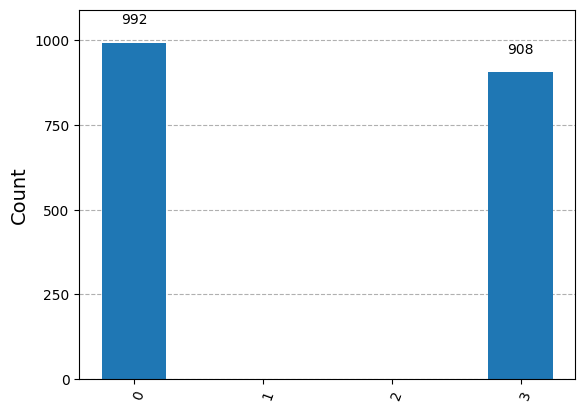

In [ ]:
# Obtener las probabilidades de medición
probabilities = result.quasi_dists[0]
counts = {key: int(value * 1024) for key, value in probabilities.items()}  # Convertir probabilidades a conteos

# Mostrar los resultados
print("Resultados de la simulación:", counts)
plot_histogram(counts)

## Programa 3 "Protocolo de teletransportación"

In [21]:
# Crear un circuito cuántico para la teletransportación
qc = QuantumCircuit(3, 3)

# Preparar el estado |ψ⟩ en Qubit 0
#qc.h(0)
qc.x(0)
qc.barrier()

# Aplicar puertas CNOT y Hadamard para entrelazar Qubit 0 con Qubit 1
# Crear un par de qubits entrelazados (Qubit 1 y Qubit 2)
qc.h(1)
qc.cx(1, 2)
qc.barrier()

# Aplicar puertas CNOT y Hadamard para entrelazar Qubit 0 con Qubit 1
qc.cx(0, 1)
qc.h(0)
qc.barrier()

# Medir Qubit 0 y Qubit 1
qc.measure([0, 1], [0, 1])
qc.draw()

┌───┐ ░            ░      ┌───┐ ░ ┌─┐   
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├───
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘
q_2: ──────░──────┤ X ├─░────────────░──╫──╫─
           ░      └───┘ ░            ░  ║  ║ 
c: 3/═══════════════════════════════════╩══╩═
                                        0  1

In [22]:
# Aplicar puertas condicionales en Qubit 2 basadas en los resultados de la medición
qc.cx(1, 2).c_if(1, 1)
qc.cz(0, 2).c_if(0, 1)

# Medir el estado final de Qubit 2
qc.measure(2, 2)

# Visualizar el circuito
print(qc.draw())

     ┌───┐ ░            ░      ┌───┐ ░ ┌─┐                            
q_0: ┤ X ├─░────────────░───■──┤ H ├─░─┤M├───────────────────■────────
     └───┘ ░ ┌───┐      ░ ┌─┴─┐└───┘ ░ └╥┘┌─┐                │        
q_1: ──────░─┤ H ├──■───░─┤ X ├──────░──╫─┤M├─────■──────────┼────────
           ░ └───┘┌─┴─┐ ░ └───┘      ░  ║ └╥┘   ┌─┴─┐        │     ┌─┐
q_2: ──────░──────┤ X ├─░────────────░──╫──╫────┤ X ├────────■─────┤M├
           ░      └───┘ ░            ░  ║  ║    └─╥─┘        ║     └╥┘
                                        ║  ║ ┌────╨────┐┌────╨────┐ ║ 
c: 3/═══════════════════════════════════╩══╩═╡ c_1=0x1 ╞╡ c_0=0x1 ╞═╩═
                                        0  1 └─────────┘└─────────┘ 2 


Resultados de la simulación: {'110': 251, '100': 249, '101': 263, '111': 261}


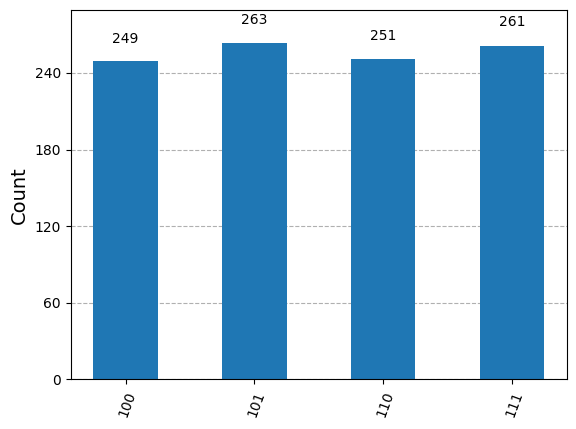

In [23]:
# Ejecutar el circuito en el simulador AerSimulator
simulator = AerSimulator()
compiled_circuit = transpile(qc, simulator)
result = simulator.run(compiled_circuit, shots=1024).result()

# Obtener los resultados
counts = result.get_counts(compiled_circuit)

# Mostrar los resultados
print("Resultados de la simulación:", counts)
plot_histogram(counts)